In [2]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

import tensorflow as tf
from matplotlib import pyplot as plt

In [5]:
import numpy as np

class CartesCoordinator:
  """
    Collection of utils for vector operation samples and exercise
  """
  def draw_coord(ax, xlim=(-5,5), ylim=(-5,5), tick_freq=1):
    xmin, xmax = xlim
    ymin, ymax = ylim

    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Employ bottom, left spines as x,y axes
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top, right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set x,y label on axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-24, y=1.03, rotation=0)

    x_ticks = np.arange(xmin-1, xmax+1, tick_freq)
    y_ticks = np.arange(ymin-1, ymax+1, tick_freq)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)


    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_xticklabels(x_ticks[x_ticks != 0])

    ax.set_yticks(y_ticks[y_ticks != 0])

    # Arrows for axes
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot(1, 0, marker='>', transform=ax.get_yaxis_transform(),**arrow_fmt)
    ax.plot(0, 1, marker='^', transform=ax.get_xaxis_transform(),**arrow_fmt)

class LimitVisualization:
  def draw_f(ax, f, func_name, x_lim, y_lim):
    X = tf.range(x_lim[0] - 1, x_lim[1] + 1, delta=0.01)

    X = tf.boolean_mask(X, tf.less(f(X), y_lim[1]))
    Y = f(X)

    # Draw f(x)
    ax.plot(X, Y, '-')
    ax.text(X[-1], Y[-1], func_name, fontsize=15)

  def draw_delta_boundary(ax, a, f, delta, domain):
    root = tf.constant(0, dtype=tf.float32)

    x1 = (a + delta)
    x2 = (a - delta)
    
    y_a = f(a)

    ax.axvspan(x1, x2, alpha=0.2, color='r', fill='w')

    ax.scatter(a, 0, color='darkred')
    ax.plot(tf.stack([a, a]), tf.stack([root, y_a]), 'r--')

    # Draw a +- \delta
    ax.annotate(s='',
                xy=(a - delta, -1),
                xytext=(a + delta, -1),
                arrowprops=dict(
                    arrowstyle='<->',
                    linewidth=1))
    
    ax.scatter(x1, 0, color='darkred')
    ax.annotate('a + δ', 
                (x1, 0), 
                xycoords='data',
                xytext=(x1 + 0.2, -1),
                fontweight='bold',
                horizontalalignment='left',
                verticalalignment='top',
                color='darkred',
                fontsize=15)
    
    ax.scatter(x2, 0, color='darkred')
    ax.annotate('a - δ', 
                (x2, 0), 
                xycoords='data',
                xytext=(x2 - 0.2, -1),
                fontweight='bold',
                horizontalalignment='right',
                verticalalignment='top',
                color='darkred',
                fontsize=15)

  def draw_eps_boundary(ax, a, f, eps, domain):
    root = tf.constant(0, dtype=tf.float32)
    y_a = f(a)

    ax.axhspan(y_a + eps, y_a - eps, alpha=0.2)

    ax.scatter(0, y_a, color='navy')
    ax.annotate('L', 
                (0, y_a + eps), 
                xycoords='data',
                xytext=(-1.5, y_a),
                weight='bold',
                horizontalalignment='right',
                verticalalignment='bottom',
                color='navy',
                fontsize=16)

    ax.plot(tf.stack([root, a]), tf.stack([y_a, y_a]), 'r--')
    ax.scatter(a, y_a, color='navy')

    # draw L +- ε
    ax.annotate(s='',
                xy=(-0.9, y_a + eps),
                xytext=(-0.9, y_a - eps),
                arrowprops=
                    dict(
                        arrowstyle='<->',
                        linewidth=2))
    
    ax.scatter(0, y_a + eps, color='navy')
    ax.annotate('L + ε', 
                (0, y_a + eps), 
                xycoords='data',
                xytext=(-1, y_a + eps + 0.4),
                weight='bold',
                horizontalalignment='right',
                verticalalignment='bottom',
                color='navy',
                fontsize=16)
    
    ax.scatter(0, y_a - eps, color='navy')
    ax.annotate('L - ε', 
                (0, y_a - eps), 
                xycoords='data',
                xytext=(-1, y_a - eps - 0.4),
                weight='bold',
                horizontalalignment='right',
                verticalalignment='top',
                color='navy',
                fontsize=16)

  def draw_limit_exist(ax, domain, f, a):
    delta = tf.minimum(eps/5, 1)

    y_a = f(a)
    ax.scatter(a, y_a)
    ax.text(a + 0.5, y_a - 0.5, f'({a},{y_a})',fontsize=12, color='r')

    # Plot (y_a +- eps) range
    root = tf.constant(0, dtype=tf.float32)
    a1 = (a + delta)[0]
    a2 = (a - delta)[0]

    ax.plot(tf.stack([root, a]), tf.stack([y_a, y_a]), 'r--')
    ax.plot(tf.stack([root, a1]), tf.stack([f(a1), f(a1)]), 'm--')
    ax.plot(tf.stack([root, a2]), tf.stack([f(a2), f(a2)]), 'm--')


    # Plot (x_a +- delta) range
    ax.plot(tf.stack([a, a]), tf.stack([root, y_a]), 'r--')
    ax.plot(tf.stack([a1, a1]), tf.stack([root, f(a1)]), 'g--')
    ax.plot(tf.stack([a2, a2]), tf.stack([root, f(a2)]), 'g--')
    ax.axvspan(a1, a2, alpha=0.2, color='r', fill='w')

    # Draw a +- \delta
    ax.annotate('a + δ', 
                (a1, 0), 
                xycoords='data',
                xytext=(a1 + 0.2, -1),
                horizontalalignment='left',
                verticalalignment='top',
                color='r',
                fontsize=13,
                arrowprops=dict(
                    facecolor='black',
                    width=1,
                    shrink=0.2))
    
    ax.annotate('a - δ', 
                (a2, 0), 
                xycoords='data',
                xytext=(a2 - 0.2, -1),
                horizontalalignment='right',
                verticalalignment='top',
                color='r',
                fontsize=13,
                arrowprops=dict(
                    facecolor='black',
                    width=1,
                    shrink=0.2))


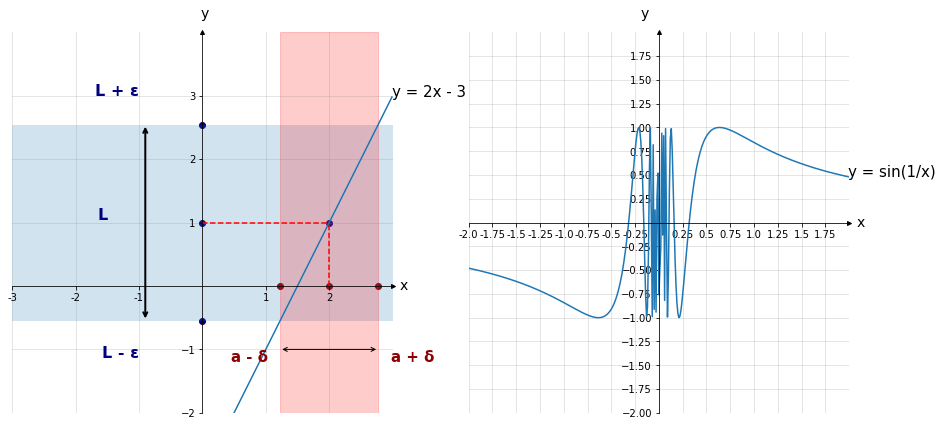

In [14]:
tf.random.set_seed(32)

x_domain = (-2, 2)
y_domain = (-1, 3)
fig, ax = plt.subplots(1, 2,figsize=(15,10))

f = lambda x: (2*x - 3)
a = tf.constant(2, dtype=tf.float32)
eps = tf.random.uniform((1,), minval=1, maxval=2)
delta = tf.minimum(eps/2, 1)

CartesCoordinator.draw_coord(ax[0], x_domain, y_domain)
LimitVisualization.draw_f(ax[0], f, 'y = 2x - 3', x_domain, y_domain)
LimitVisualization.draw_eps_boundary(ax[0], a, f, eps, x_domain)
LimitVisualization.draw_delta_boundary(ax[0], a, f, delta, x_domain)

x_domain = (-1.0, 1.0)
y_domain = (-1.0, 1.0)

f = lambda x: tf.math.sin(1/x)
CartesCoordinator.draw_coord(ax[1], x_domain, y_domain, tick_freq=0.25)
LimitVisualization.draw_f(ax[1], f, 'y = sin(1/x)', x_domain, y_domain)

plt.show()